In [2]:
import json, os
i = 4
directory = os.getcwd()
monpremierex = json.load(open(f"{directory}/input/tcl{i}/tcl{i}.json", "r"))
monpremierex_output = json.load(open(f"{directory}/output/tcl{i}/tcl{i}.json", "r"))

In [3]:
print(monpremierex)

{'name': 'tcl4', 'input_path': 'tcl/input/tcl4', 'output_path': 'tcl/output/tcl4', 'working_dir': 'tcl/input/tcl4', 'initial_temperature': 17.348983330460378, 'coefDeltaTemp': 0.05625, 'coefConso': 1, 'puissanceMin': 0, 'puissanceMax': 4, 'temperature_max': 20.481278725774267, 'temperature_min': 16.669260673579775, 'chroniqueTempExt': [10.577401732801436, 13.245989044289841, 13.579781113898807, 14.26131168788988, 12.443749334743778, 11.511746309153688, 11.270372978668153, 10.199547928245446, 12.352224802144411, 11.936467246889839, 10.968139689755102, 10.178618231660137, 10.51248158480548, 12.305596856239534, 11.873394412218227, 14.870001412628412, 14.055476606090968, 15.243015879250954, 15.633308252069, 16.345108096714423, 17.620518738388945, 17.163906244836813, 17.59402301375067, 19.398638231577593, 18.845432328494148, 20.14547309144729, 18.573164614013653, 19.399696050989878, 19.19585467416864, 19.638860049986235, 18.547817508015118, 19.547346223579723, 20.163538860260893, 20.8197323

In [4]:
temperature_max = monpremierex["temperature_max"]
temperature_min = monpremierex["temperature_min"]
coefDeltaTemp = monpremierex["coefDeltaTemp"]
electricity_cost = monpremierex["electricity_cost"]
coefConso = monpremierex["coefConso"]
initial_temperature = monpremierex["initial_temperature"]
chroniqueTempExt = monpremierex["chroniqueTempExt"]
puissanceMin = monpremierex["puissanceMin"]
puissanceMax = monpremierex["puissanceMax"]
load = monpremierex_output["load"]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
T = 48
temp_profile = np.zeros(T)
temp_profile[0] = initial_temperature
temp_min_liste =  [temperature_min for k in range(T)]
temp_max_liste =  [temperature_max for k in range(T)]
for t in range(1,T):
    temp_profile[t] = temp_profile[t - 1] + load[t] * coefConso*0.5 + 0.5*coefDeltaTemp*(chroniqueTempExt[t-1]-temp_profile[t-1])

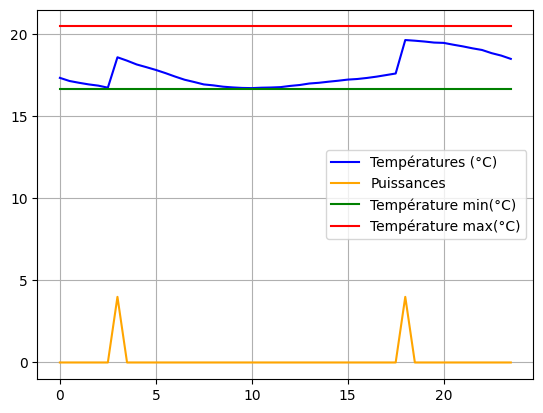

In [7]:
temps = [k/2 for k in range(48)]
plt.plot(temps, temp_profile, label='Températures (°C)', color='blue', marker='')
plt.plot(temps, load, label='Puissances', color='orange', marker='')
plt.plot(temps, temp_min_liste, label='Température min(°C)', color='green', marker='')
plt.plot(temps, temp_max_liste, label='Température max(°C)', color='red', marker='')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
facture_totale=0
for i in range(4):
    tcl_i = json.load(open(f"{directory}/output/tcl{i+1}/tcl{i+1}.json", "r"))
    facture_totale+=tcl_i["cost"]
print(facture_totale)

-728.112110533912
